# 0) Instructions:
Please complete the workbook below. Some of the calculations are already ready to be "run". However, please read the text carefully to find questions that you should answer for credit. Remember that to answer a question in text, you click "insert", then "insert cell below", switch the input from "code" to "markdown", type your answer, and finally click the run button to set your text in stone. In a few questions, you will need to do some calculations on your own. Hint: for these calculations you can copy, paste, and modify code that is above the calculation that you need to do. You may work by yourself or in groups of 2. Please remember to put your name on top, remember to save the workbook, and remember to upload to Canvas.

**Please read** Please run the code below to install the "pwr" package. **Do not proceed until the star goes away! Do not click run twice**!

In [ ]:
install.packages('pwr', dep = TRUE)

**Please read** Please run the code below and ignore the output. This code is simply setting the height and width of the plots we will make later on and loading the "tidyverse" and "pwr" packages that we will use.

In [1]:
options(repr.plot.width = 6, repr.plot.height = 5)
library(tidyverse)
library(pwr)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


# 1) Power for tests regarding $\mu$

## 1.1) Computing power "by hand"

In Lecture \#12 we had an example of a city wanting to test whether the population mean $\mu$ of lead (in PPB) in tap water was less than 5. 

**Question for you.** Please explain what the null and alternative hypotheses are given this scenario. Also please explain whether it is a one-sided test, or two-sided test. If it is a one-sided test, what side is the rejection region on? Please answer these questions below (insert new cell, change to markdown, and type your responses). 

In that same example from Lecture \#12, the city wanted to conduct the test at $\alpha = 0.01$, knew that $\sigma = 1$, and wanted to calculate the power from using a random sample of $n=10$ taps for determining the amount of lead. To make this calculation, the formula $\text{Power}=1-\beta = 1 - P\left(Z \leq z_{\alpha} - \frac{\mu_0 - \mu_a}{\sigma / \sqrt{n}} \right)$ was used. For example, to determine the power if the true population mean was $4.5$, the following was done: 

In [131]:
1 - pnorm(qnorm(.01, lower.tail = FALSE) - .5 / (1 / sqrt(10)))

[1] 0.2280727

This told us that the power (or probability of rejecting the null hypothesis given that the population mean is 4.5 instead of the $\mu_0=5$ tested against) was 0.228. Equivalently, since $\text{Power} = 1-\beta$, the probability of making a Type II error was $1-0.228=0.772$. This means that the probability of not rejecting the null hypothesis that $\mu > 5$, when the true population mean is 4.5 is 0.772.

**Question for you** Using the same formula for determining power in this scenario, and copying and pasting the code into a new code cell below, determine the power the city would have if they conducted the same hypothesis test using $\alpha = 0.05$ instead of $\alpha = 0.01$. After using the formula with new values, please insert a markdown cell below that to explain your result. 

## 1.2) Computing power using software
Power calculation are often difficult to do by hand. Also, when doing a Power analysis before conducting an experiment or when planning a study, many different scenarios may be evaluated. As a result, you usually will need to use software for power calculations. 

Below, we will redo the first power calculation we did in this lab using the "pwr.norm.test" function from the \emph{pwr} package in R. This function has a few arguments that we need to know about. If we supply an "n" this is the sample size we will have, if we specify "sig.level" this is our $\alpha$ value, if we specify an "alternative" this tells the function whether we have a one-sided test (with alternatives "less" or "greater") or a two-sided test ("two.sided"). Finally, the argument "d" is the value $\frac{\mu_a - \mu_0}{\sigma}$. For the city's experiment to determine the amount of lead in the water, they wanted to see the power if $\mu_a = 4.5$, given $\mu_0 = 5$, and $\sigma = 1$. Consequently $d = \frac{\mu_a - \mu_0}{\sigma} = \frac{4.5 - 5}{1} = -0.5$. Here is that calculation:

In [2]:
pwr.norm.test(n = 10, d = -.5, sig.level = .01, power = , alternative = "less")


     Mean power calculation for normal distribution with known variance 

              d = -0.5
              n = 10
      sig.level = 0.01
          power = 0.2280727
    alternative = less


Notice that in that above "pwr.norm.test" code we used "power = ". By specifying one of the arguments as "equal to blank", we are asking the function to find that value for us. So in the last calculation by saing "power = ", we were asking it to compute power given the other arguments that we supplied ("n", "d", "sig.level", "alternative").

Often, we want to determine the power we would have (in advance of doing an experiment or starting a study) for various hypothetical true population values $\mu_a$. For example, in the case of the city wanting to determine if the amount of lead is less than 5 ppb, they might want to know the power if the true population mean is 1, 2, 3, 4, 4.5 or even 4.95. Next, we will make a sequence or list of possible values of $\mu_a$ and see the power we have for each of them. First, let's see how to create a sequence of possible $\mu_a$ values that goes from 3 to 5 with steps of 0.05: 

In [132]:
seq(from = 3, to = 5, by = 0.05)

[1] 3.00 3.05 3.10 3.15 3.20 3.25 3.30 3.35 3.40 3.45 3.50 3.55 3.60 3.65 3.70
[16] 3.75 3.80 3.85 3.90 3.95 4.00 4.05 4.10 4.15 4.20 4.25 4.30 4.35 4.40 4.45
[31] 4.50 4.55 4.60 4.65 4.70 4.75 4.80 4.85 4.90 4.95 5.00

Great, now to use the "pwr.norm.test" function we need to use the argument "d", where $d = \frac{\mu_a - \mu_0}{\sigma}$. Since $\sigma = 1$, and anything divided by 1 is itself we can make the sequence of "d" values by taking the last sequence me made and subtracting our $\mu_0=5$:

In [133]:
seq(from = 3, to = 5, by = 0.05) - 5

[1] -2.00 -1.95 -1.90 -1.85 -1.80 -1.75 -1.70 -1.65 -1.60 -1.55 -1.50 -1.45
[13] -1.40 -1.35 -1.30 -1.25 -1.20 -1.15 -1.10 -1.05 -1.00 -0.95 -0.90 -0.85
[25] -0.80 -0.75 -0.70 -0.65 -0.60 -0.55 -0.50 -0.45 -0.40 -0.35 -0.30 -0.25
[37] -0.20 -0.15 -0.10 -0.05  0.00

Of course this is the same thing as the following:

In [134]:
seq(from = -2, to = 0, by = 0.05)

[1] -2.00 -1.95 -1.90 -1.85 -1.80 -1.75 -1.70 -1.65 -1.60 -1.55 -1.50 -1.45
[13] -1.40 -1.35 -1.30 -1.25 -1.20 -1.15 -1.10 -1.05 -1.00 -0.95 -0.90 -0.85
[25] -0.80 -0.75 -0.70 -0.65 -0.60 -0.55 -0.50 -0.45 -0.40 -0.35 -0.30 -0.25
[37] -0.20 -0.15 -0.10 -0.05  0.00

So we will use the above sequence for determining the power the city would have for various true population means $\mu_a$:

In [135]:
pwr.norm.test(n = 10, d = seq(from = -2, to = 0, by = .05), sig.level = .01, power =, alternative = "less") 


     Mean power calculation for normal distribution with known variance 

              d = -2.00, -1.95, -1.90, -1.85, -1.80, -1.75, -1.70, -1.65, -1.60, -1.55, -1.50, -1.45, -1.40, -1.35, -1.30, -1.25, -1.20, -1.15, -1.10, -1.05, -1.00, -0.95, -0.90, -0.85, -0.80, -0.75, -0.70, -0.65, -0.60, -0.55, -0.50, -0.45, -0.40, -0.35, -0.30, -0.25, -0.20, -0.15, -0.10, -0.05, 0.00
              n = 10
      sig.level = 0.01
          power = 0.99996809, 0.99993851, 0.99988429, 0.99978735, 0.99961832, 0.99933085, 0.99885398, 0.99808241, 0.99686481, 0.99499064, 0.99217697, 0.98805690, 0.98217253, 0.97397542, 0.96283795, 0.94807825, 0.92900021, 0.90494799, 0.87537183, 0.83989920, 0.79840280, 0.75105579, 0.69836436, 0.64117008, 0.58061782, 0.51808997, 0.45511299, 0.39324651, 0.33396842, 0.27856990, 0.22807268, 0.18317727, 0.14424572, 0.11131762, 0.08415344, 0.06229636, 0.04514287, 0.03201246, 0.02220924, 0.01507044, 0.01000000
    alternative = less


The above output looks messy. However, we can see that there are the values "d", "n", "sig.level" ($\alpha$), and the "power" that has been determined by the function. To make plots of these values we will want to pull out just the power values. To do this we can use the "\\$". You probably noticed befoe that when we had a dataset that contained variables (as columns), we could use the "\\$" to pull out the variable (or column) that we were interested in. We will do the same thing here. The output contains many things but we only want the "power" values. So we will add "$power" to the end of the "pwr.norm.test" command to get just the power values out: 

In [26]:
pwr.norm.test(n = 10, d = seq(-2, 0, .05), sig.level = .01, power =, alternative = "less")$power

[1] 0.99996809 0.99993851 0.99988429 0.99978735 0.99961832 0.99933085
 [7] 0.99885398 0.99808241 0.99686481 0.99499064 0.99217697 0.98805690
[13] 0.98217253 0.97397542 0.96283795 0.94807825 0.92900021 0.90494799
[19] 0.87537183 0.83989920 0.79840280 0.75105579 0.69836436 0.64117008
[25] 0.58061782 0.51808997 0.45511299 0.39324651 0.33396842 0.27856990
[31] 0.22807268 0.18317727 0.14424572 0.11131762 0.08415344 0.06229636
[37] 0.04514287 0.03201246 0.02220924 0.01507044 0.01000000

**Question for you** Now, using the same code as above, determine the power that the city would have if they had a higher tolerance for making Type I errors (falsely rejecting the null hypothesis that $\mu > 5$, when the null hypothesis is true). Determine the power the city would have given the same $n$ and "d" values as above, but with an $\alpha$ of 0.10. Please copy, paste, and modify the code from above to answer this question. After using the code to determine the power values, please insert a markdown cell below and describe wether the power would be higher or lower for the same "d" values when you change $\alpha$ from 0.01 to 0.10.

## 1.3) Making a plot of Power versus $d = (\mu_a - \mu_0) / \sigma$
Plots are often the best way for us to see the power we would have for an experiment or a study given various alternative true population means. To make a plot showing the power against $d = (\mu_a - \mu_0) / \sigma$, we need to first save the values "d" and "Power" so that we can make the plot. Below, we will save the values "d" as a new variable called "d1" and the power values that we computed above as "pwr1". 

In [41]:
d1 <- seq(-2, 0, .05)
pwr1 <- pwr.norm.test(n = 10, d = seq(-2, 0, .05), sig.level = .01, power =, alternative = "less")$power

Now that we have saved those "d" and "power" values, we will make a "data.frame" (or dataset) that has both as columns. We will also add a third column called "sigma" for $\sigma$, as we will later compare power for different values of $\sigma$. Below, we will create this "data.frame" and save it as "df1":

In [42]:
df1 <- data.frame(d = d1, pwr = pwr1, sigma = "1")

Now that we have saved those "d" and "power" values in the "data.frame" called "df1", we will use them to plot the power that the city would have for the various values of $d = (\mu_a - \mu_0) / \sigma$. To do this we will use the "plot" function. This function plots an "x" variable values on the horizontal axis and "y" variable values on the vertical axis using "plot(x, y)". We will add "xlab" and "ylab" arguments which will label the axes the way we would like: 

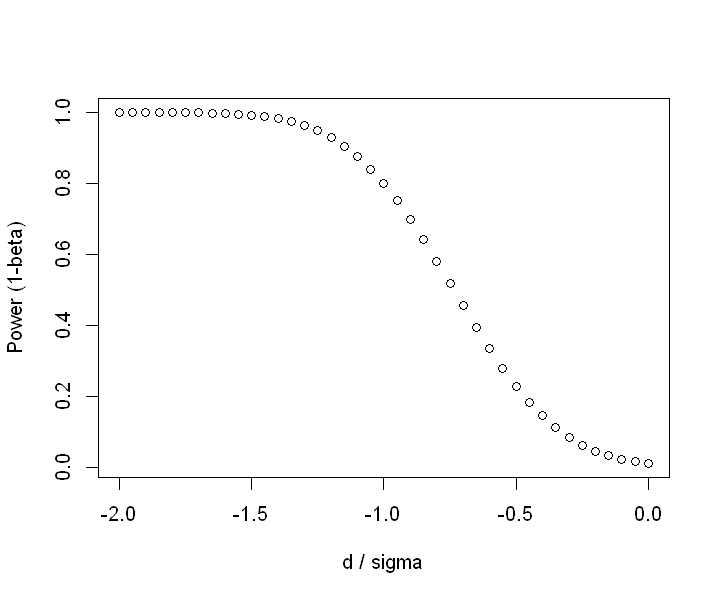

In [43]:
plot(df1$d, df1$pwr, xlab = "d / sigma", ylab = "Power (1-beta)")

There are a few different ways to make plots in R. The way we just used is the default way. "ggplot" is another way of making many different kinds of visualizations. It is based on adding elements of a plot together. Below is an example of making the same plot using "ggplot". You don't need to know this, but you might enjoy making plots this way. The first part "ggplot(data, aes(x, y))" tells the software that we want to make a "ggplot" with a specific dataset and a specific aesthetic mapping "aes". Then we add "geom_point" to plot the points, we add "theme_bw" to change the color theme of the plot (if you are interested, try removing this part and seeing the default theme), we add "labs" to change the axes labels.

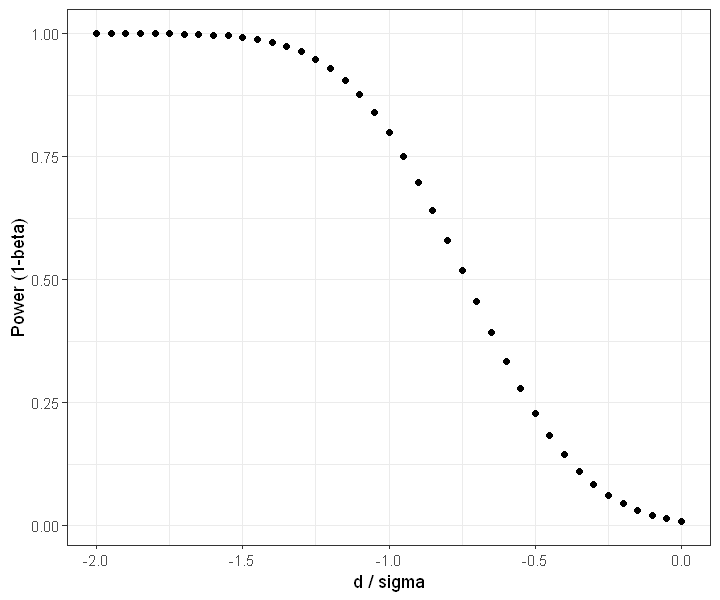

In [44]:
ggplot(df1, aes(x = d, y = pwr)) + geom_point() + theme_bw() + labs(x = "d / sigma", y = "Power (1-beta)")

We can make the same plot with lines joining the points by adding "geom_line" to what we did before:

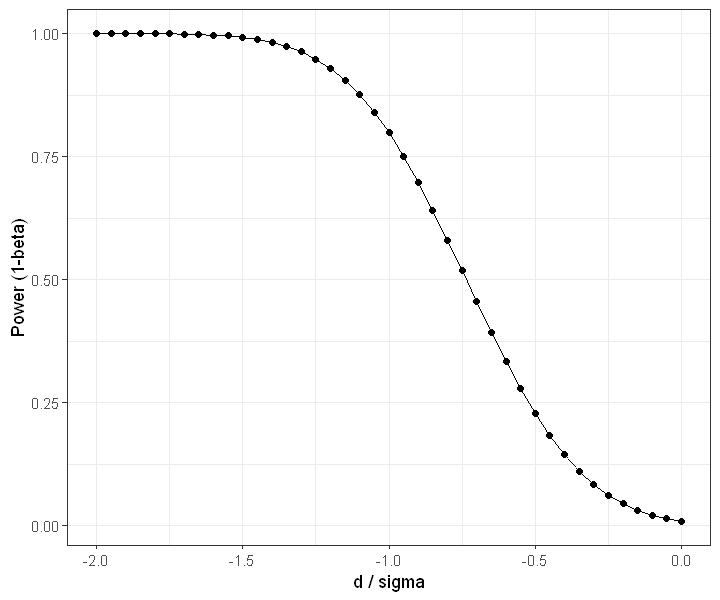

In [52]:
ggplot(df1, aes(x = d, y = pwr)) + geom_point() + geom_line() + 
  theme_bw() + labs(x = "d / sigma", y = "Power (1-beta)")

## 1.4) Determining how the population variance changes power
Now, we determine how different population variances would effect the power the city has to determine if the amount of lead in water is less than 5 ppb. If the population variance was higher we would expect to see the measurement of lead having more variability. 

**Question for you**. Do you think that a greater population variance will increase or decrease the power the city has to determine if the amount of lead is less than 5 ppb? For example, if the population standard deviation (remember standard deviation is the square root of variance) was 2 instead of 1 (like before), would the power increase or decrease relative to what we computed before? Please answer below (insert new cell below, change to markdown, and answer in a complete sentence). 

Below we will repeat the same calculation as before, however with $\sigma = 2$. This means that we now have $d = \frac{\mu_a - \mu_0}{\sigma} = \frac{\mu_a - 5}{2}$ for the same sequence of $\mu_a$ values. We can supply these "d" values by taking the exact same sequence we had before "seq(-2, 0, .05)" and dividing each number by 2. Let's see what the power is for this new sequence of "d" values with the larger $\sigma = 2$:

In [45]:
pwr.norm.test(n = 10, d = seq(-2, 0, .05) / 2, sig.level = .01, power =, alternative = "less") 


     Mean power calculation for normal distribution with known variance 

              d = -1.000, -0.975, -0.950, -0.925, -0.900, -0.875, -0.850, -0.825, -0.800, -0.775, -0.750, -0.725, -0.700, -0.675, -0.650, -0.625, -0.600, -0.575, -0.550, -0.525, -0.500, -0.475, -0.450, -0.425, -0.400, -0.375, -0.350, -0.325, -0.300, -0.275, -0.250, -0.225, -0.200, -0.175, -0.150, -0.125, -0.100, -0.075, -0.050, -0.025, 0.000
              n = 10
      sig.level = 0.01
          power = 0.79840280, 0.77543698, 0.75105579, 0.72533318, 0.69836436, 0.67026502, 0.64117008, 0.61123189, 0.58061782, 0.54950757, 0.51808997, 0.48655956, 0.45511299, 0.42394534, 0.39324651, 0.36319774, 0.33396842, 0.30571327, 0.27856990, 0.25265694, 0.22807268, 0.20489422, 0.18317727, 0.16295637, 0.14424572, 0.12704033, 0.11131762, 0.09703931, 0.08415344, 0.07259663, 0.06229636, 0.05317317, 0.04514287, 0.03811856, 0.03201246, 0.02673762, 0.02220924, 0.01834589, 0.01507044, 0.01231072, 0.01000000
    alternative = less


Now let's see what the power values would be for $\sigma = 0.5$. Now we will have $d = \frac{\mu_a - \mu_0}{\sigma} = \frac{\mu_a - 5}{0.5}$ for the same sequence of $\mu_a$ values. 

In [46]:
pwr.norm.test(n = 10, d = seq(-2, 0, .05) / .5, sig.level = .01, power =, alternative = "less") 


     Mean power calculation for normal distribution with known variance 

              d = -4.0, -3.9, -3.8, -3.7, -3.6, -3.5, -3.4, -3.3, -3.2, -3.1, -3.0, -2.9, -2.8, -2.7, -2.6, -2.5, -2.4, -2.3, -2.2, -2.1, -2.0, -1.9, -1.8, -1.7, -1.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1.0, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0.0
              n = 10
      sig.level = 0.01
          power = 1.00000000, 1.00000000, 1.00000000, 1.00000000, 1.00000000, 1.00000000, 1.00000000, 1.00000000, 1.00000000, 1.00000000, 1.00000000, 1.00000000, 1.00000000, 1.00000000, 1.00000000, 0.99999999, 0.99999993, 0.99999962, 0.99999818, 0.99999200, 0.99996809, 0.99988429, 0.99961832, 0.99885398, 0.99686481, 0.99217697, 0.98217253, 0.96283795, 0.92900021, 0.87537183, 0.79840280, 0.69836436, 0.58061782, 0.45511299, 0.33396842, 0.22807268, 0.14424572, 0.08415344, 0.04514287, 0.02220924, 0.01000000
    alternative = less


In [47]:
pwr2 <- pwr.norm.test(n = 10, d = seq(-2, 0, .05) / 2, sig.level = .01, power =, alternative = "less")$power
pwr.5 <- pwr.norm.test(n = 10, d = seq(-2, 0, .05) / .5, sig.level = .01, power =, alternative = "less")$power

In [48]:
df2 <- data.frame(d = d1, pwr = pwr2, sigma = "2")
df.5 <- data.frame(d = d1, pwr = pwr.5, sigma = ".5")

In [49]:
df <- rbind(df.5, df1, df2)

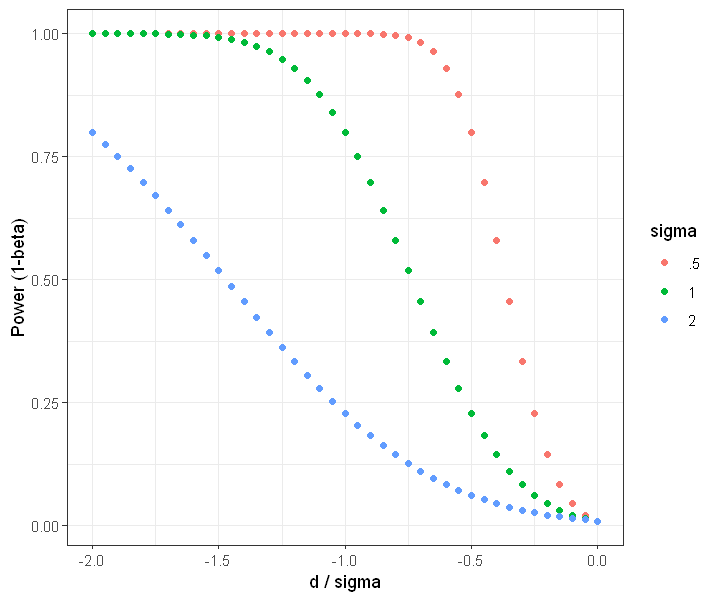

In [51]:
ggplot(df, aes(x = d, y = pwr, color = sigma)) + geom_point() + 
  theme_bw() + labs(x = "d / sigma", y = "Power (1-beta)")

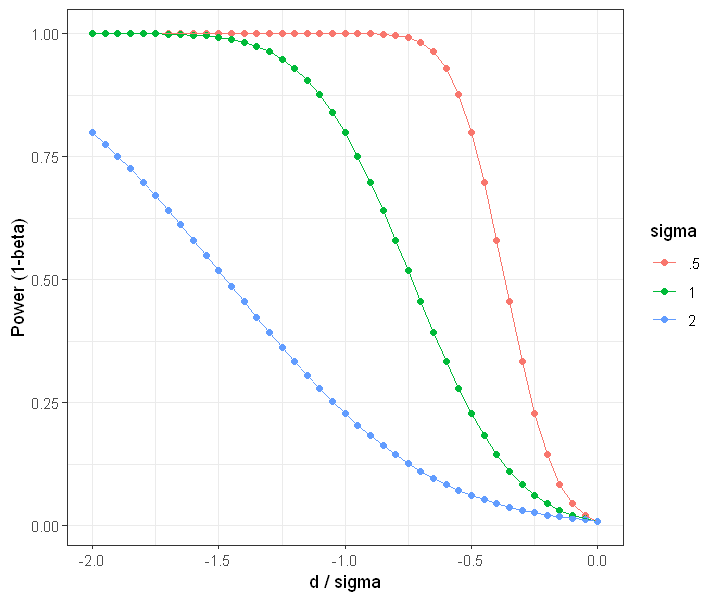

In [53]:
ggplot(df, aes(x = d, y = pwr, color = sigma)) + geom_point() + geom_line() + 
  theme_bw() + labs(x = "d / sigma", y = "Power (1-beta)")

In [54]:
pwr.norm.test(n = 10, d = seq(-2, 0, .05), sig.level = .01, power =, alternative = "less")


     Mean power calculation for normal distribution with known variance 

              d = -2.00, -1.95, -1.90, -1.85, -1.80, -1.75, -1.70, -1.65, -1.60, -1.55, -1.50, -1.45, -1.40, -1.35, -1.30, -1.25, -1.20, -1.15, -1.10, -1.05, -1.00, -0.95, -0.90, -0.85, -0.80, -0.75, -0.70, -0.65, -0.60, -0.55, -0.50, -0.45, -0.40, -0.35, -0.30, -0.25, -0.20, -0.15, -0.10, -0.05, 0.00
              n = 10
      sig.level = 0.01
          power = 0.99996809, 0.99993851, 0.99988429, 0.99978735, 0.99961832, 0.99933085, 0.99885398, 0.99808241, 0.99686481, 0.99499064, 0.99217697, 0.98805690, 0.98217253, 0.97397542, 0.96283795, 0.94807825, 0.92900021, 0.90494799, 0.87537183, 0.83989920, 0.79840280, 0.75105579, 0.69836436, 0.64117008, 0.58061782, 0.51808997, 0.45511299, 0.39324651, 0.33396842, 0.27856990, 0.22807268, 0.18317727, 0.14424572, 0.11131762, 0.08415344, 0.06229636, 0.04514287, 0.03201246, 0.02220924, 0.01507044, 0.01000000
    alternative = less


In [57]:
pwr.norm.test(n = 10, d = seq(-2, 0, .05), sig.level = .01, power =, alternative = "two.sided")


     Mean power calculation for normal distribution with known variance 

              d = 2.00, 1.95, 1.90, 1.85, 1.80, 1.75, 1.70, 1.65, 1.60, 1.55, 1.50, 1.45, 1.40, 1.35, 1.30, 1.25, 1.20, 1.15, 1.10, 1.05, 1.00, 0.95, 0.90, 0.85, 0.80, 0.75, 0.70, 0.65, 0.60, 0.55, 0.50, 0.45, 0.40, 0.35, 0.30, 0.25, 0.20, 0.15, 0.10, 0.05, 0.00
              n = 10
      sig.level = 0.01
          power = 0.99991113, 0.99983505, 0.99970098, 0.99947054, 0.99908423, 0.99845258, 0.99744521, 0.99587823, 0.99350083, 0.98998275, 0.98490495, 0.97775652, 0.96794107, 0.95479563, 0.93762425, 0.91574662, 0.88855966, 0.85560733, 0.81665109, 0.77173180, 0.72121288, 0.66579620, 0.60650475, 0.54463067, 0.48165243, 0.41912983, 0.35858907, 0.30141205, 0.24874303, 0.20142328, 0.15995954, 0.12452717, 0.09500403, 0.07102746, 0.05206518, 0.03749037, 0.02665315, 0.01894265, 0.01383664, 0.01093819, 0.01000000
    alternative = two.sided


In [62]:
pwr1_Less <- pwr.norm.test(n = 10, d = seq(-2, 0, .05), sig.level = .01, power =, alternative = "less")$power
pwr1_TwoSided <- pwr.norm.test(n = 10, d = seq(-2, 0, .05), sig.level = .01, power =, alternative = "two.sided")$power

In [64]:
df1_Less <- data.frame(d = seq(-2, 0, .05), pwr = pwr1_Less, alternative = "Less than")
df1_TwoSided <- data.frame(d = seq(-2, 0, .05), pwr = pwr1_TwoSided, alternative = "Two-tailed")

In [66]:
df1_BothAlternatives <- rbind(df1_Less, df1_TwoSided)

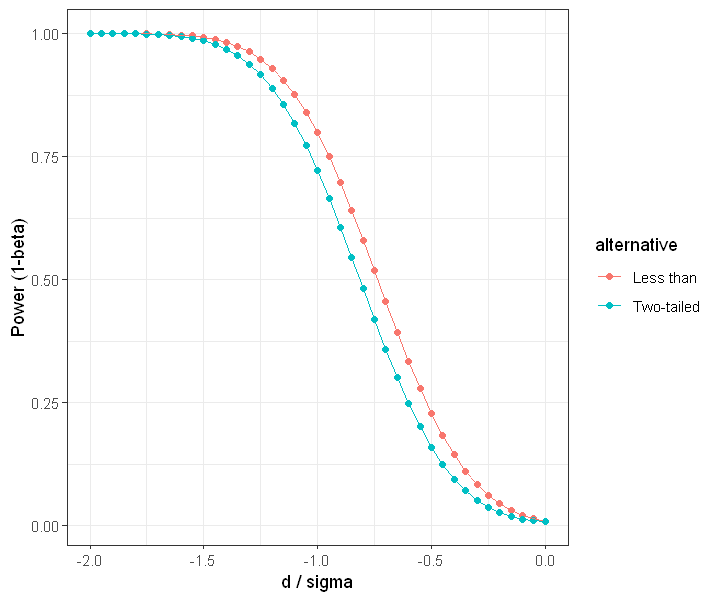

In [67]:
ggplot(df1_BothAlternatives, aes(x = d, y = pwr, color = alternative)) + geom_point() + geom_line() + 
  theme_bw() + labs(x = "d / sigma", y = "Power (1-beta)")

In [120]:
ds <- seq(10, 40, .1)
dOverSigma <- ds / 100

In [121]:
sapply(dOverSigma, function(x) pwr.norm.test(n = , d = x, sig.level = .1, power = .9, alternative = "greater")$n)

[1] 656.94977 644.00526 631.43961 619.23816 607.38699 595.87280 584.68295
  [8] 573.80537 563.22851 552.94147 542.93368 533.19514 523.71635 514.48804
 [15] 505.50152 496.74841 488.22070 479.91071 471.81109 463.91481 456.21512
 [22] 448.70555 441.37984 434.23211 427.25661 420.44785 413.80056 407.30968
 [29] 400.97032 394.77782 388.72767 382.81555 377.03730 371.38887 365.86643
 [36] 360.46626 355.18478 350.01852 344.96417 340.01851 335.17845 330.44101
 [43] 325.80330 321.26254 316.81605 312.46124 308.19561 304.01674 299.92228
 [50] 295.90999 291.97767 288.12323 284.34459 280.63981 277.00702 273.44426
 [57] 269.94979 266.52189 263.15887 259.85910 256.62101 253.44307 250.32380
 [64] 247.26176 244.25557 241.30386 238.40534 235.55874 232.76281 230.01637
 [71] 227.31826 224.66732 222.06252 219.50274 216.98698 214.51421 212.08347
 [78] 209.69381 207.34433 205.03410 202.76228 200.52797 198.33045 196.16882
 [85] 194.04235 191.95026 189.89183 187.86634 185.87304 183.91136 181.98054
 [92] 180.07998 178.20903 176.36709 174.55356 172.76785 171.00941 169.27768
 [99] 167.57213 165.89222 164.23744 162.60730 161.00132 159.41900 157.85990
[106] 156.32356 154.80954 153.31741 151.84675 150.39714 148.96820 147.55953
[113] 146.17074 144.80146 143.45134 142.12001 140.80713 139.51236 138.23538
[120] 136.97584 135.73343 134.50785 133.29880 132.10597 130.92909 129.76786
[127] 128.62201 127.49127 126.37538 125.27407 124.18710 123.11422 122.05517
[134] 121.00974 119.97768 118.95876 117.95277 116.95949 115.97870 115.01020
[141] 114.05376 113.10922 112.17638 111.25502 110.34496 109.44602 108.55803
[148] 107.68080 106.81413 105.95793 105.11196 104.27611 103.45014 102.63397
[155] 101.82742 101.03035 100.24260  99.46400  98.69445  97.93381  97.18192
[162]  96.43866  95.70389  94.97749  94.25933  93.54928  92.84724  92.15301
[169]  91.46661  90.78782  90.11657  89.45273  88.79619  88.14686  87.50463
[176]  86.86939  86.24104  85.61949  85.00463  84.39637  83.79461  83.19927
[183]  82.61025  82.02747  81.45082  80.88024  80.31563  79.75692  79.20401
[190]  78.65684  78.11531  77.57936  77.04890  76.52387  76.00418  75.48978
[197]  74.98057  74.47650  73.97750  73.48349  72.99443  72.51021  72.03080
[204]  71.55614  71.08615  70.62077  70.15995  69.70364  69.25175  68.80425
[211]  68.36106  67.92215  67.48745  67.05691  66.63047  66.20809  65.78972
[218]  65.37529  64.96477  64.55811  64.15525  63.75615  63.36077  62.96905
[225]  62.58095  62.19643  61.81544  61.43794  61.06389  60.69325  60.32597
[232]  59.96201  59.60134  59.24391  58.88968  58.53863  58.19069  57.84584
[239]  57.50412  57.16533  56.82956  56.49674  56.16683  55.83981  55.51563
[246]  55.19427  54.87569  54.55986  54.24674  53.93632  53.62856  53.32341
[253]  53.02087  52.72089  52.42344  52.12854  51.83608  51.54609  51.25853
[260]  50.97336  50.69057  50.41013  50.13202  49.85615  49.58261  49.31130
[267]  49.04221  48.77531  48.51059  48.24801  47.98757  47.72922  47.47296
[274]  47.21875  46.96659  46.71644  46.46828  46.22210  45.97781  45.73550
[281]  45.49512  45.25663  45.01999  44.78521  44.55226  44.32112  44.09177
[288]  43.86420  43.63839  43.41432  43.19196  42.97132  42.75235  42.53506
[295]  42.31942  42.10542  41.89303  41.68225  41.47305  41.26543  41.05936

In [122]:
ns <- sapply(dOverSigma, function(x) pwr.norm.test(n = , d = x, sig.level = .1, power = .9, alternative = "greater")$n)

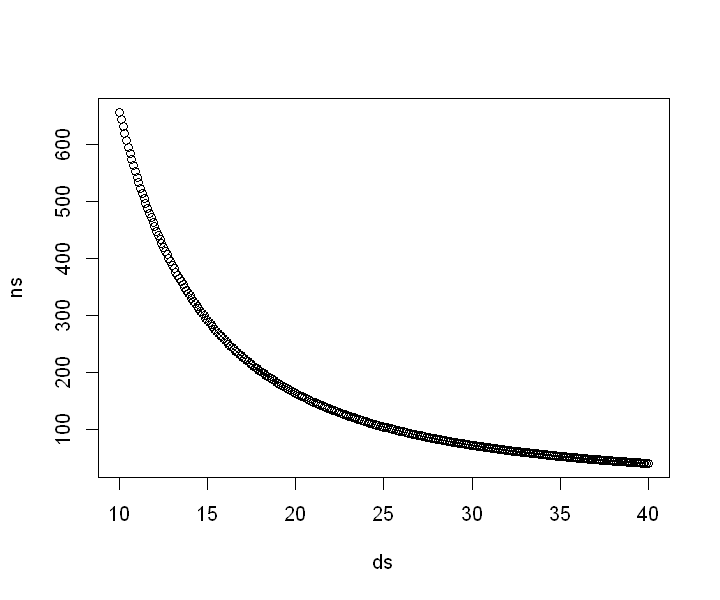

In [123]:
plot(ds, ns)